# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Import libraries and dependencies
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from newsapi import NewsApiClient
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\claud\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")

In [6]:
bitcoin_news

{'status': 'ok',
 'totalResults': 8508,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Jeff Somers',
   'title': 'Is the Crypto Bubble Going to Burst?',
   'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
   'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
   'publishedAt': '2022-02-09T16:00:00Z',
   'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'},
  {'sou

In [7]:
# Print total Bitcoin news articles
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

Total articles about Bitcoin: 8508


In [8]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
ethereum_news

{'status': 'ok',
 'totalResults': 3968,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Corin Faife',
   'title': 'Crypto.com admits over $30 million stolen by hackers',
   'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
   'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
   'publishedAt': '2022-01-20T13:23:31Z',
   'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author

In [9]:
# Print total Ethereum news articles
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

Total articles about Ethereum: 3968


In [10]:
# Create a function that accepts a topic DataFrame, and creates and returns the sentiment scores DataFrame
def create_sentiments_df(topic_news):
    topic_sentiments = []

    for article in topic_news["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            topic_sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })
        except AttributeError:
            pass

    # Create the DataFrame
    topic_df = pd.DataFrame(topic_sentiments)

    # Reorder the DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    topic_df = topic_df[cols]

    return topic_df



In [11]:
# Create the Bitcoin sentiment scores DataFrame
# Call the create_sentiments_df() function and assign the returned DataFrame to bitcoin_df
bitcoin_df = create_sentiments_df(bitcoin_news)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-09,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
2,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
3,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
4,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871


In [12]:
# Create the Ethereum sentiment scores DataFrame
# Call the create_sentiments_df() function and assign the returned DataFrame to ethereum_df
ethereum_df = create_sentiments_df(ethereum_news)
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962
4,2022-02-10,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899


In [13]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.039480,0.060950,0.041250,0.897800
std,0.393121,0.059169,0.049184,0.068563
min,-0.493900,0.000000,0.000000,0.729000
25%,-0.344025,0.000000,0.000000,0.874750
50%,0.038600,0.054000,0.000000,0.912000
75%,0.328950,0.108750,0.085000,0.934000
max,0.680800,0.185000,0.151000,1.000000


In [14]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.133000,0.064100,0.022100,0.913800
std,0.331538,0.064006,0.045603,0.078963
min,-0.680800,0.000000,0.000000,0.775000
25%,0.000000,0.000000,0.000000,0.875500
50%,0.038600,0.048500,0.000000,0.913000
75%,0.406800,0.106000,0.011750,1.000000
max,0.757900,0.217000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a set of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords set if necessary
sw_addons = {'said', 'today', 'week'}
sw = sw.union(sw_addons)


In [16]:
# Complete the tokenizer function
def tokenizer(text, sw):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words_lower = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word for word in words_lower if word not in sw]
    
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = [tokenizer(text, sw) for text in bitcoin_df["text"]]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-09,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[even, arent, paying, attention, bitcoin, cryp..."
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000,"[denis, rusinovich, set, cryptocurrency, minin..."
2,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
3,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
4,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."


In [18]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = [tokenizer(text, sw) for text in ethereum_df["text"]]
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, eth, bitcoin, taken..."
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000,"[hackers, made, roughly, million, ethereum, cr..."
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"[level, new, mayor, simply, employing, ageold,..."
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962,"[back, september, robinhood, announced, plan, ..."
4,2022-02-10,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899,"[people, buy, cryptocurrencies, intended, hold..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
# Define a function that creates a master list of all the tokens in a given DataFrame
def create_df_tokens_list(df):
    # Create a new list that will contain the tokens of all the token lists in the given DataFrame's "tokens" column
    master_tokens_list = []
    df_tokens = df["tokens"]
    for tokens_list in df_tokens:
        for token in tokens_list:
            master_tokens_list.append(token)
    return master_tokens_list


In [38]:
# Generate the Bitcoin N-grams where N=2
# First call the create_df_tokens_list() to create the list of all the bitcoin tokens 
bitcoin_tokens_list = create_df_tokens_list(bitcoin_df)
bitcoin_bigrams = list(ngrams(bitcoin_tokens_list, n=2))
# Show a sample of the bigrams
print(bitcoin_bigrams[:20])


[('even', 'arent'), ('arent', 'paying'), ('paying', 'attention'), ('attention', 'bitcoin'), ('bitcoin', 'cryptocurrencies'), ('cryptocurrencies', 'might'), ('might', 'noticed'), ('noticed', 'value'), ('value', 'plummeted'), ('plummeted', 'last'), ('last', 'total'), ('total', 'value'), ('value', 'market'), ('market', 'tumbling'), ('tumbling', 'high'), ('high', 'tr'), ('tr', 'char'), ('char', 'denis'), ('denis', 'rusinovich'), ('rusinovich', 'set')]


In [37]:
# Generate the Ethereum N-grams where N=2
# First call the create_df_tokens_list() to create the list of all the ethereum tokens 
ethereum_tokens_list = create_df_tokens_list(ethereum_df)
ethereum_bigrams = list(ngrams(ethereum_tokens_list, n=2))
# Show a sample of the bigrams
print(ethereum_bigrams[:20])


[('new', 'blog'), ('blog', 'post'), ('post', 'company'), ('company', 'eth'), ('eth', 'bitcoin'), ('bitcoin', 'takenillustration'), ('takenillustration', 'alex'), ('alex', 'castro'), ('castro', 'vergein'), ('vergein', 'blog'), ('blog', 'post'), ('post', 'published'), ('published', 'early'), ('early', 'hour'), ('hour', 'thursday'), ('thursday', 'morning'), ('morning', 'cryptocurrency'), ('cryptocurrency', 'char'), ('char', 'hackers'), ('hackers', 'made')]


In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Use token_count to get the top 10 words for Bitcoin
# Use the master bitcoin tokens list created above
# Create a dictionary from the results of the token_count function call
bitcoin_top_10 = dict(token_count(bitcoin_tokens_list, 10))
# Create a DataFrame using the dictionary
pd.DataFrame(list(bitcoin_top_10.items()), columns=["word", "count"])

,word,count
0,char,20
1,bitcoin,16
2,company,9
3,cryptocurrency,7
4,ha,7
5,mining,6
6,open,5
7,new,5
8,el,4
9,building,4


In [26]:
# Use token_count to get the top 10 bigrams for Bitcoin
# Create a dictionary from the results of the token_count function call
bitcoin_top_10_bigrams = dict(token_count(bitcoin_bigrams, 10))
# Create a DataFrame using the dictionary
pd.DataFrame(list(bitcoin_top_10_bigrams.items()), columns=["bigram", "count"])

,bigram,count
0,"(bitcoin, mining)",4
1,"(el, salvador)",3
2,"(alex, castro)",3
3,"(building, open)",3
4,"(open, bitcoin)",3
5,"(mining, system)",3
6,"(blog, post)",3
7,"(bitcoin, char)",2
8,"(alongside, us)",2
9,"(illustration, alex)",2


In [28]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_10 = dict(token_count(ethereum_tokens_list, 10))
# Create a DataFrame using the dictionary
pd.DataFrame(list(ethereum_top_10.items()), columns=["word", "count"])


,word,count
0,char,19
1,ethereum,9
2,cryptocurrency,8
3,new,6
4,company,5
5,million,5
6,platform,4
7,digital,4
8,blockchains,4
9,blog,3


In [29]:
# Use token_count to get the top 10 bigrams for Ethereum
ethereum_top_10_bigrams = dict(token_count(ethereum_bigrams, 10))
# Create a DataFrame using the dictionary
pd.DataFrame(list(ethereum_top_10_bigrams.items()), columns=["bigram", "count"])


,bigram,count
0,"(blog, post)",3
1,"(new, blog)",2
2,"(post, company)",2
3,"(according, new)",2
4,"(char, crypto)",2
5,"(char, feb)",2
6,"(feb, reuters)",2
7,"(char, believers)",2
8,"(believers, open)",2
9,"(open, public)",2


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [39]:
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [54]:
# Define a function that generates a word cloud given a tokens list
def create_wordcloud(tokens_list):
    input_text = ' '.join(tokens_list)
    wc = WordCloud().generate(input_text)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

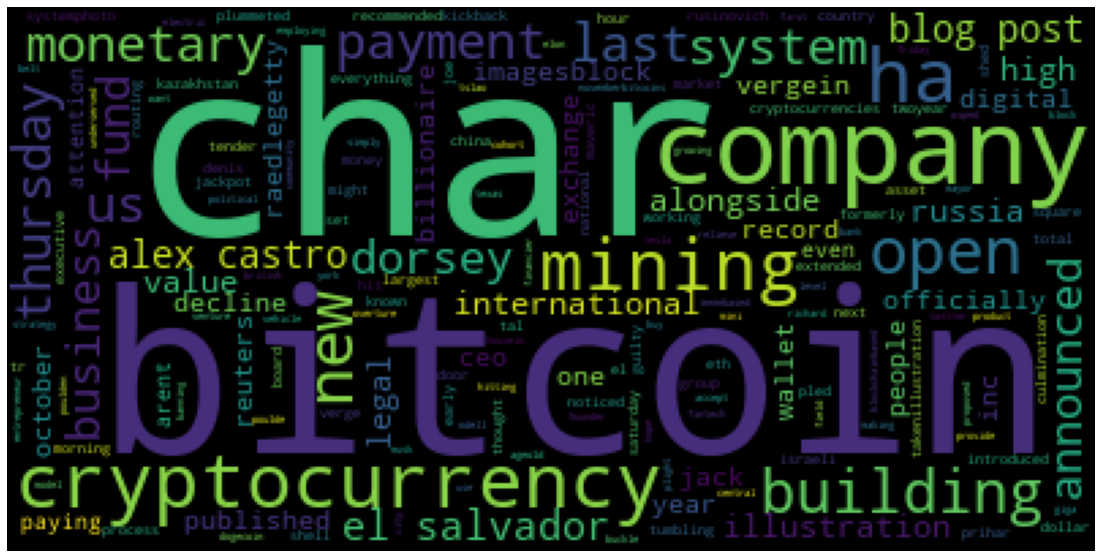

In [55]:
# Generate the Bitcoin word cloud
# Use the create_wordcloud() function 
create_wordcloud(bitcoin_tokens_list)

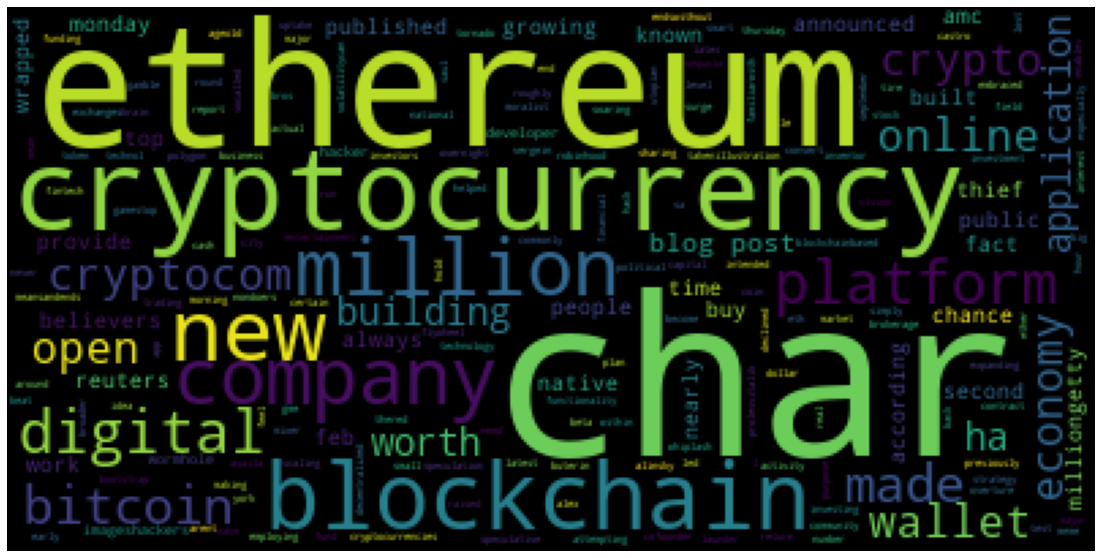

In [56]:
# Generate the Ethereum word cloud
# Use the create_wordcloud() function 
create_wordcloud(ethereum_tokens_list)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---